<a href="https://colab.research.google.com/github/Tyronita/Top-level-Domain-Enqueries/blob/master/Copy_of_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math, statistics, random

# Some basics
The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation.


# Preparing the data
- First lets import it.
- Then lets clean the data by removing rows which contain missing values

In [ ]:
# Read the CSV
transactions = pd.read_csv("creditcard.csv")

# the isnull method detects missing values for an array-like object.
print("Any missing values?", transactions.isnull().values.any())

Any missing values? False


- As there was no missing values, we can go on to remove any duplicate records:
- `duplicated()` is an inbuilt method that finds duplicate rows based on all columns or some specific columns. The pandas.duplicated() function returns a Boolean Series with True value for each duplicated row.

In [ ]:
duplicates = transactions[transactions.duplicated()]
duplicates[duplicates.Class == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102442,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102443,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102444,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102445,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102446,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
141260,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


# Dimension reductionality techniques

`Missing Values Ratio:`
  * Data columns with too many missing values are unlikely to carry much useful information. Thus data columns with number of missing values greater than a given threshold can be removed. The higher the threshold, the more aggressive the reduction.

`Low Variance Filter:`
- Similarly to the previous technique, data columns with little changes in the data carry little information. Thus all data columns with variance lower than a given threshold are removed. A word of caution: variance is range dependent; therefore normalization is required before applying this technique.
   
`High Correlation Filter:`
- Data columns with very similar trends are also likely to carry very similar information. In this case, only one of them will suffice to feed the machine learning model. Here we calculate the correlation coefficient between numerical columns and between nominal columns as the Pearson’s Product Moment Coefficient and the Pearson’s chi square value respectively. Pairs of columns with correlation coefficient higher than a threshold are reduced to only one. A word of caution: correlation is scale sensitive; therefore column normalization is required for a meaningful correlation comparison.

`Backward Feature Elimination:`
- In this technique, at a given iteration, the selected classification algorithm is trained on n input features. Then we remove one input feature at a time and train the same model on n-1 input features n times. The input feature whose removal has produced the smallest increase in the error rate is removed, leaving us with n-1 input features. The classification is then repeated using n-2 features, and so on. Each iteration k produces a model trained on n-k features and an error rate e(k). Selecting the maximum tolerable error rate, we define the smallest number of features necessary to reach that classification performance with the selected machine learning algorithm.

`Forward Feature Construction:`
- This is the inverse process to the Backward Feature Elimination. We start with 1 feature only, progressively adding 1 feature at a time, i.e. the feature that produces the highest increase in performance.

Both algorithms, Backward Feature Elimination and Forward Feature Construction, are quite time and computationally expensive. They are practically only applicable to a data set with an already relatively low number of input columns.


# Getting ready to plot data

In [ ]:
# Plotting the data - .plot(...) for line & .scatter(...) for scatter

def plotFeatures(trainingSet, feature1, feature2):
    
    fraud = trainingSet[trainingSet.Class == 1]
    non_fraud = trainingSet[trainingSet.Class == 0]
    
    # Input features to plot
    plt.scatter(fraud[feature1], fraud[feature2])
    plt.scatter(non_fraud[feature1], non_fraud[feature2])
    
    # label the axis
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    
    # Create legend
    plt.legend(["Fraud", "Non-fraud"])
    
    # Display
    plt.show()

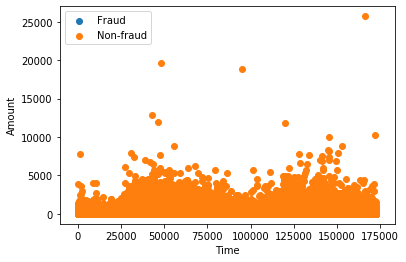

In [ ]:
plotFeatures(transactions ,'Time', 'Amount')

## We're going to selct features using a `high correlation filter`:
- Data columns with very similar trends are also likely to carry very similar information. In this case, only one of them will suffice to feed the machine learning model. Here we calculate the correlation coefficient between numerical columns and between nominal columns as the Pearson’s Product Moment Coefficient and the Pearson’s chi square value respectively. 
- Correlation is scale sensitive; therefore column standardization is required for a meaningful correlation comparison.

# Column standardization

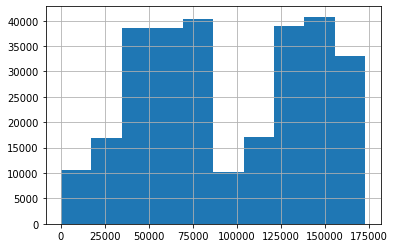

In [ ]:
# Lets see the distribution for time and amount before
transactions['Time'].hist()

plt.show()

In [ ]:
def standardiseColumn(columnName: str, trainingSet: pd.DataFrame):
    
    # get the lower and upper quartiles and calculate the interquartile range
    LQ, UQ = trainingSet[columnName].quantile([0.25, 0.75])
    IQR = UQ - LQ
    
    # and then get median of the column
    median = trainingSet[columnName].median()
    
    # get all the column values - which are stored in the float64 type
    vals = trainingSet[columnName].values
    
    # standardise every value in the column:
    scaledVals = list(map(lambda vals: (float(vals) - median) / IQR, vals))
        
    # convert the scaled array into the dataFrame
    trainingSet[columnName + '_Scaled'] = pd.DataFrame(scaledVals)

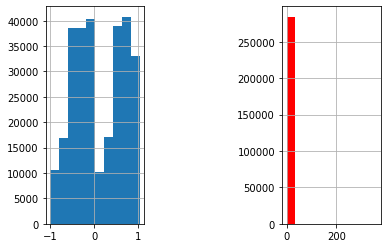

In [ ]:
standardiseColumn('Amount', transactions)
standardiseColumn('Time', transactions)

# Now lets see how the distribution for time has changed

plt.subplot(1, 3, 1)
transactions['Time_Scaled'].hist()

plt.subplot(1, 3, 3)
transactions['Amount_Scaled'].hist(color='r')

plt.show()

In [ ]:
# standardise every value for correlation analysis

standardiseColumn('Amount', transactions)
standardiseColumn('Time', transactions)

In [ ]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled,Time_Scaled
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,0.927124,0.118914
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,3.495006,0.557903
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,-0.307413,-0.994983
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,-0.229162,-0.358210
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,0.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,0.770838,0.641790
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,358.683155,1.035022


# Correlation analysis
- Make a function which inputs a training set and outputs heatmap of a correlation matrix between the variables
- We can make this a heatmap to visually find features which correlate highly to class

In [ ]:
def correlationMatrix(trainingSet):
    
    # create a large display
    fig = plt.figure(figsize=(20, 15))
    plt.matshow(trainingSet.corr(), cmap='coolwarm_r', fignum=fig.number)

    # number of features
    featuresCount = trainingSet.shape[1]

    plt.xticks(range(featuresCount), trainingSet.columns, rotation="55")
    plt.yticks(range(featuresCount), trainingSet.columns)

    plt.colorbar()
    plt.show()

# Lets create our first training set
- We are going to balance the dataset for our first training set
- Make the correlation matrix

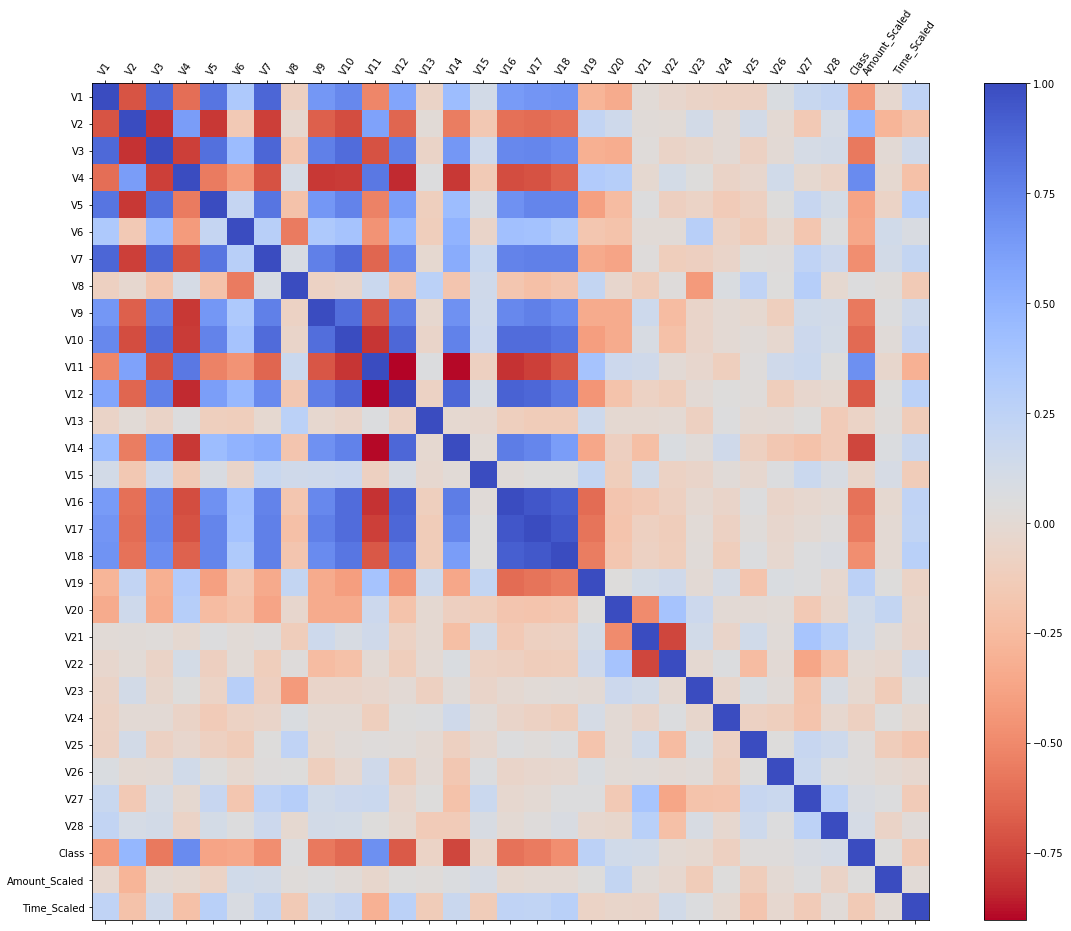

In [ ]:
# Separating the portion of records that were fraulent
fraud = transactions[transactions.Class == 1]

# Get the amount of fraudulent records
fraudCount = len(fraud)

# Take the random sample of non-fraudulent records
non_fraud = transactions[transactions.Class == 0].sample(fraudCount)

frames = [fraud, non_fraud]
dataset = pd.concat(frames) 

# drop unscaled Amount and Time for correlation analysis
dataset = dataset.drop(['Time', 'Amount'], axis = 1)

correlationMatrix(dataset)

# Lets plot these correlations for logistic regression

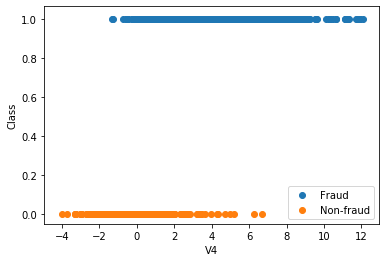

In [ ]:
# Seems to be strong negative correlation with V14 and strong positive with V4 so lets plot these
plotFeatures(dataset, 'V4', 'Class')

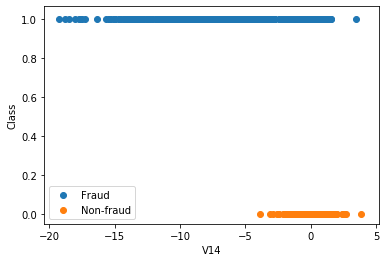

In [ ]:
plotFeatures(dataset, 'V14', 'Class')

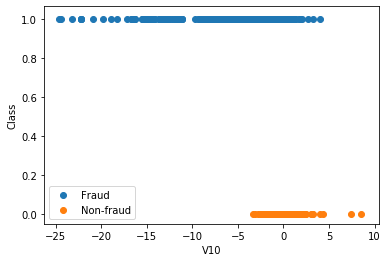

In [ ]:
# There's slightly weaker corrrelation with v10, v11 and v12
plotFeatures(dataset, 'V10', 'Class') # negative correlation

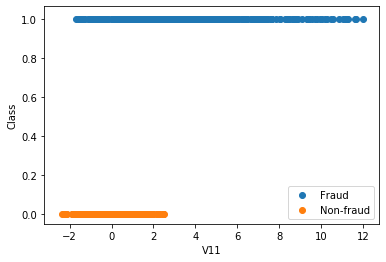

In [ ]:
plotFeatures(dataset, 'V11', 'Class') # positive corellation

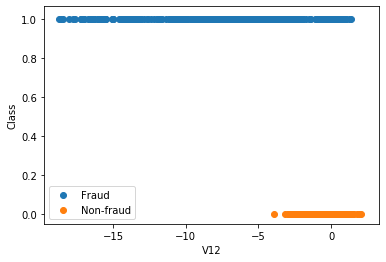

In [ ]:
plotFeatures(dataset, 'V12', 'Class') # negative correlation


# Lets see if fraud and non-fraud cluster by other two variables
- Lets start randomly and then find a clustering algorithm: K-nearest-neighbours is probably suitable.

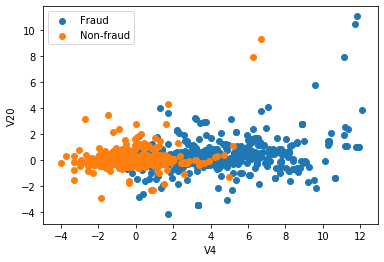

In [ ]:
plotFeatures(dataset, 'V4', 'V20')

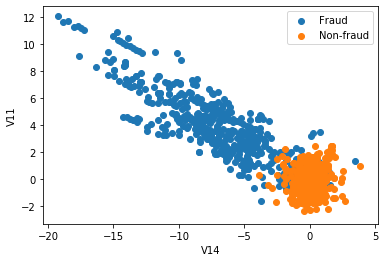

In [ ]:
plotFeatures(dataset, 'V14', 'V11')

# Now time to begin the development of our logistic regression algorithm

## 1. Sigmoid Function
- Takes in the parameters and a training example.
- Calculates a prediction for the probability of a transaction being fraudulent
- In the breakdown , lets make a function which multiplies each repectivive parameter to each feature where x0 = 1

### Definitions:
- a training example is defined to be 

In [ ]:
def sigmoid(trainingExample, featureNames: list, parameters: list) -> float:
    """
    j is the index of the feature out of our selected feature set.
    n is the number of selected features
    """
    z = 0 # our input to the sigmoid (probability) function
    n = len(featureNames)
    for j in range(n):
        featureName = featureNames[j]
        jthFeatureVal, jthParameterVal = trainingExample[featureName], parameters[j]
        z += jthFeatureVal * jthParameterVal       
    return 1 / (1 + math.exp(-z))

## 2. Cost Function
- Takes in the parameters and a training example.
- Calculates the average error and is a measure of how well our model performed
- We will use it to see how much we reduced it after gradient decent

In [ ]:
def cost(trainingSet, featureNames: list, parameters: list) -> float:
    """
    m is the total number of training examples 
    """
    costSum = 0
    # iterate over dataframe by row
    for index, trainingExample in trainingSet.iterrows():
        probability = sigmoid(trainingExample, featureNames, parameters) - 0.000001
        # the piecewise implemation
        if trainingExample.Class == 1:
            costSum += -math.log(probability)
        else:
            costSum += -math.log(1 - probability)
    # Makes an average
    m = trainingSet.shape[0]
    return costSum / m

## 3. Gradient Descent
- Tunes a model’s parameters by calculating the partial derivative of the cost function with respect to the parameters in inputs in order to find the minimum cost output - the lowest error when making predictions.
- It needs to have a learning rate set, if too high, the algorithm won't converge, if too low, it'll take too long to converge.


In [ ]:
def costPartialDerivative(trainingSet, jthFeature: str, featureNames: list, parameters: list):
    """
    'jthFeature' is the name of the feature we're partially differentiating the cost function with respct to.
    'm' is the total number of training examples 
    """
    m = trainingSet.shape[0]
    pdSum = 0
    for index, trainingExample in trainingSet.iterrows():
        probability = sigmoid(trainingExample, featureNames, parameters)
        jthFeatureVal = trainingExample[jthFeature]
        pdSum += (probability - trainingExample["Class"]) * jthFeatureVal
    return pdSum / m

In [ ]:
def descent(trainingSet, featureNames: list, learningRate = 0.1):
    
    iteration = 1
    costHistory = []
    
    # initialise all parameters at 0 as it's as good as being a random guess 
    parameters = [0 for x in featureNames]
    
    # boolean flag indicating if the cost function has reached a minimum
    hasConverged = False
    
    # infinite loop but we break out when we reach convergence - this is subject to change
    while not hasConverged:
        
        # temp holders for calculated parameters
        newParameters = parameters
        
        # initialise values of the partial derviatives of the cost function (with the respect to the current parameter)
        # to null as they cannot be calculated yet
        pdValHistory = [None for x in featureNames]
        
        # iteratively work out each parameter of index idx
        for j, jthParameter in enumerate(parameters):
            
            # Calculate the value of the partial derviatives of the cost function (with the respect to the current parameter)
            pdVal = costPartialDerivative(trainingSet, featureNames[j], featureNames, parameters)
            
            # Calculate the new value of the current parameter
            newParameter = jthParameter - (learningRate * pdVal)
            
            # update our new parameter and pd value
            newParameters[j] = newParameter
            pdValHistory[j] = pdVal
            
        # simultaneously update all our variables // we don't have to change pds as they will be recalulcated
        prevParameter = newParameters
        
        iteration += 1
        
        if iteration % 1000 == 0:
            currentCost = cost(trainingSet, featureNames, parameters)
            print(currentCost, "- cost")
            print(statistics.mean(pdValHistory), "avrg partial derivative (Cost gradient)")
            costHistory.append(currentCost)
    
        if statistics.mean(pdValHistory) < 0.0001:
            # breaks and exits program
            hasConverged = True
            
    return newParameters

# First test
- 1. Choose trainingset - small at first
- 2. Add columns for predicted prob and predicted class, and our 0th feature should always be 1
- 3. Select Variables, start with 2 very highly correlated ones
- 4. See if the cost function works
- 5. plot the sigmoid and calculate a parametrized example

In [ ]:
# 1- One fifth the size of our dataset
trainingSet = dataset.sample(len(dataset) // 5) 

In [ ]:
# 2- Add Columns
trainingSet['V0'] = 1 # x0 = 1 for matrix multipication with the constant term
trainingSet['Predicted_Class'] = None
trainingSet['Predicted_Prob'] = None

In [ ]:
# 3 - creates the correlation matrix
corr = trainingSet.corr()

# abs returns the absolute (positive) values, unstack lays it out as a list
correlatedPairs = corr.abs().unstack() 

# sorts corrlations in terms of descending order 
correlatedPairs.sort_values(ascending = False).drop_duplicates()[1:]

V16    V17              0.950295
V17    V18              0.938191
V5     V1               0.914433
V1     V3               0.912109
V3     V7               0.911482
                          ...   
V10    Amount_Scaled    0.001012
Class  V24              0.000517
V15    V23              0.000390
V21    V5               0.000276
V1     V0                    NaN
Length: 466, dtype: float64

We're using a `Forward Feature Construction` and `High Correlation Filter:` strategy:
 - beginning by using V17 and V16, always v0

In [ ]:
# now we can select our features - v0 is always mandatory
featureNames = ['V0' ,'V16', 'V17']

# Generate some random parameter values for testing
# parameters = [random.randint(-2,2) for x in featureNames]
# print(parameters)

# Test our training set exists
trainingSet[featureNames]

,V0,V16,V17
75903,1,-1.600807,0.716062
8617,1,-1.233958,1.632009
10897,1,-8.333242,-12.602596
282744,1,-0.883841,-0.041822
149357,1,-2.425016,-3.960623
...,...,...,...
154720,1,-5.022557,-8.522975
144863,1,-0.417033,0.968343
243393,1,-5.145638,-6.293479
240824,1,0.378934,-0.337360


In [ ]:
# trainingExample = trainingSet.iloc[0]

# Lets do a couple tests for our sigmoid function
# print(trainingExample[featureNames])
# print(sigmoid(trainingExample, featureNames, parameters))


### Sigmoid and parametrize function test....
- I've put it all in my calculator and IT WORKS :)
- Now time to do a dry test our cost function

In [ ]:
# cost(trainingSet, featureNames, parameters)

### Cost works :) 
- we'll use this to keep a history and plot it to see if it's value really does converge after a number of iterations
- Now lets check the partial derivative function before we jump into the more complex descent function
- j takes 3 values at the moment, 0, 1, 2 as there's 3 parameters

In [ ]:
# costPartialDerivative(trainingSet, 'V17', featureNames, parameters)

In [ ]:
tunedParameters = descent(trainingSet, featureNames)

In [ ]:
testExample = trainingSet.sample(1)
print(testExample["Class"])
sigmoid(testExample, featureNames, tunedParameters)

258973    0
Name: Class, dtype: int64
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2


0.25471586240939303

# Evaluation Environment

In [ ]:
def test(testingSet, featureNames, tunedParameters):
    """
    Evaluates every case where the model correctly/incorrectly predicted positive or negative 
    """
    # where True Positive = tp, False Negative = fn, etc
    tp = tn = fp = fn = 0
    
    for index, testingExample in testingSet.iterrows():
        
        # Use our tuned parameters and selected features to calculate a probability of a test example being fraudulent
        probability = sigmoid(testingExample, featureNames, tunedParameters)
        
        # Decision bounday
        if probability > 0.5:         
            predictedClass= 1
        else:
            predictedClass= 0
        
        # Assign these predicted values to the respective set
        testingSet.at[index, "Predicted_Prob"] = probability
        testingSet.at[index, "Predicted_Class"] = predictedClass
        
        # Get the actual target class
        actualClass = testingSet.loc[index]["Class"]
        
        if actualClass == predictedClass:
            if actualClass == 1:
                tp += 1
            else:
                tn += 1
        else:
            if predictedClass == 1:
                fp += 1
            else:
                fn += 1
    return (tp, tn, fp, fn)

In [ ]:
def recall(testResults):
    tp, tn, fp, fn = testResults
    # true positives / true positives + false negatives
    return tp / (tp + fn)

def precision(testResults):
    tp, tn, fp, fn = testResults
    # true positives / true positives + false positive
    return tp / (tp + fp)

In [ ]:
results = test(trainingSet, featureNames, tunedParameters)

V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.088835

V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2
V0 -0.8853174304804688 0
V16 -0.5976539092431359 1
V17 -0.08883549686646534 2


In [ ]:
print("RECALL: ", recall(results))
print("PRECISION", precision(results))

RECALL:  0.6526315789473685
PRECISION 0.9538461538461539


## Before we move on:
- 1: We need **k-fold cross validation**
- 2: A simpler and less data intensive way to store our 0th feature (=1)
- 3: A **CLEAR DEFINITION of a model** and the associated data structure which will contain it
- 4: A graphical representation of our decreasing cost function and a **confusion matrix generator**
- 5: We need to normalise our input to the sigmoid function to prevent math domain errors with the logarithm . e.g log(0) = undefined

In [ ]:
featureNames = ['V0', 'V14', 'V11', 'V13', 'V17', 'V18']
transactions['V0'] = 1
tunedParameters = descent(dataset, featureNames, 0.5)

0.2922231672260352 - cost
0.02038054760505968 avrg partial derivative (Cost gradient)
0.24476623580695606 - cost
0.012328173604448635 avrg partial derivative (Cost gradient)
0.22762107300435383 - cost
0.008541690435550094 avrg partial derivative (Cost gradient)
0.21973678496209162 - cost
0.006308490841855642 avrg partial derivative (Cost gradient)
0.21561866791854908 - cost
0.004834510464031684 avrg partial derivative (Cost gradient)
0.21329308207468953 - cost
0.003795798691963025 avrg partial derivative (Cost gradient)
0.211908527841863 - cost
0.003031434436008286 avrg partial derivative (Cost gradient)
0.21105245473834763 - cost
0.0024513504798717124 avrg partial derivative (Cost gradient)
0.21050807292060372 - cost
0.0020009219008190076 avrg partial derivative (Cost gradient)
0.2101544134986448 - cost
0.0016450082324478183 avrg partial derivative (Cost gradient)
0.2099208080300687 - cost
0.0013599415577931066 avrg partial derivative (Cost gradient)
0.20976446752442557 - cost
0.00112

In [ ]:
transactions['V0'] = 1
tunedParameters

[-2.2469096164326396,
 -1.0921977632741287,
 0.4549661875279096,
 -0.3299163464907371,
 -0.1238172839439683,
 -0.04476776579778756]

In [ ]:
print(featureNames, tunedParameters)
results = test(transactions, featureNames, tunedParameters)
print("RECALL: ", recall(results))
print("PRECISION" ,precision(results))

['V0', 'V14', 'V11', 'V13', 'V17', 'V18'] [-2.2469096164326396, -1.0921977632741287, 0.4549661875279096, -0.3299163464907371, -0.1238172839439683, -0.04476776579778756]
RECALL:  0.8699186991869918
PRECISION 0.058255070096638085


In [ ]:
results

(428, 277396, 6919, 64)

In [ ]:
class evaluation:
    def accuraccy(testResults):
        tp, tn, fp, fn = testResults
        # true positives / true positives + false negatives
        return (tp + tn) / (tp + fn)
    def recall(testResults):
        tp, tn, fp, fn = testResults
        # true positives / true positives + false negatives
        return tp / (tp + fn)
    
    def precision(testResults):
        tp, tn, fp, fn = testResults
        # true positives / true positives + false positive
        return tp / (tp + fp)
    